In [42]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

In [43]:
# Due the different version of python can be found and each machine or libriries 
# I just decided to use this library to avoid distraction and anoing warnigs
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from IPython.display import Image
Image(filename =r"Pop_imig_2023.png", width = 900, height = 400)

In [45]:
# Import data
df = pd.read_csv("PEA15.csv")

# df = sns.load_dataset("PEA15.csv").rename(columns={"Component": "Indicator"})
#df

# Making sure that my data set is ready to - EDA
    - df.head( )
    - df.info( )
    - df.describe( )
    - df.shape
    - df.dtypes

In [ ]:
df.head(10)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         80 non-null     int64  
 1   Component    80 non-null     object 
 2   VALUE        80 non-null     float64
 3   real_number  80 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ KB


In [67]:
df.describe()

,Year,VALUE,real_number
count,80.000000,80.000000,8.000000e+01
mean,2018.500000,662.897500,6.628975e+05
std,2.890403,1624.673646,1.624674e+06
min,2014.000000,-8.500000,-8.500000e+03
25%,2016.000000,34.125000,3.412500e+04
50%,2018.500000,56.700000,5.670000e+04
75%,2021.000000,76.325000,7.632500e+04
max,2023.000000,5281.600000,5.281600e+06


In [70]:
df.shape

(80, 4)

In [69]:
df.dtypes

Year             int64
Component       object
VALUE          float64
real_number    float64
dtype: object

In [ ]:
df.count()

In [47]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [48]:
#Cleaning my dataset - I won"t need these 2 columns
to_drop = ["STATISTIC Label",
            "UNIT"]
df.drop(to_drop, inplace=True, axis=1)

In [49]:
#Converting the numbers to be better in the visualisation
df ["real_number"] = df ["VALUE"]* 1000

In [ ]:
print(df.columns)

In [50]:
def label_graph(ticksfont , x_label , y_label , title_label , fontsize):
    
    plt.xticks(fontsize = ticksfont)
    plt.yticks(fontsize = ticksfont)

    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label , fontsize = fontsize)
    plt.title(title_label, fontsize = fontsize)

In [ ]:
# Getting unique years in the DataFrame
years = df["Year"].unique()

# Create a separate bar plot for each year
for year in years:
    year_data = df[df["Year"] == year]

# Filter out the "population" row for the current year
    year_data = year_data[year_data["Component"] != "Population"]

# Group the data by "Component" and calculate the sum of "VALUE"
    grouped = year_data.groupby("Component")["real_number"].sum()

# Create a bar plot for the current year
    plt.figure(figsize=(14, 5))
    bars = plt.bar(grouped.index, grouped.values, color="skyblue")
    plt.grid(axis = "y")
    label_graph(10 ,"Component" , "Real Number" , f"Bar Plot for Year {year}" , 16 )
# Annotate each bar with its value
    for bar in bars:
        height = int (bar.get_height()) # Convert height to an integer better vizualisation
        plt.annotate(f"{height}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                     textcoords="offset points", ha="center", va="bottom")

# Show each plot
    plt.show()

In [ ]:
# Filter rows where "Component" contains "Net migration"
subdata_netMig = df[df["Component"].str.contains("Net migration")]

# Select "Year" and "real_number" columns
subdata_netMig = subdata_netMig[["Year", "real_number"]]

In [ ]:
print(subdata_netMig)

In [ ]:
subdata_netMig.describe()

In [ ]:
# Creating a line plot for "Net migration" over the years
plt.figure(figsize=(15, 7))
plt.plot(subdata_netMig["Year"], subdata_netMig["real_number"], marker="o", linestyle="-", 
         c="b", ms = 8) # "ms" abreviation to markersize "c" to color
plt.grid(True)
#plt.plot(2023, 77600 , marker = "o" , color = "r" , markersize = 15)

plt.xticks(subdata_netMig["Year"])
label_graph(14 ,"Year" , "Net Migration" , "Net Migration Over the Years" , 16 )

# "-", "--", "-.", ":", "None", " ", "", "solid", "dashed", "dashdot", "dotted"

In [ ]:
# Filter rows where "Component" contains "Population change" and creating a new df
subdata_pop_chang = df[df["Component"].str.contains("Population change")]

# Select "Year" and "real_number" columns
subdata_pop_chang2 = subdata_pop_chang[[ "real_number"]]

In [ ]:
subdata_pop_chang

In [ ]:
subdata_pop_chang2.describe()

## Using Normal distribution to explain or identify some information about your dataset
    - df.head( )
    - 

In [71]:
# Sample statistics for "subdata_pop_chang2"
mean = 63540.0  # Mean of the "real_number" column
std_dev = 20298.067779  # Standard deviation of the "real_number" column
num_samples = 10  # Number of data points, matching the count in your statistics

# Generate random data following a normal distribution
normal_data = np.random.normal(mean, std_dev, num_samples)

# Create a DataFrame with the generated data
df_normal = pd.DataFrame({"real_number": normal_data})

# Display the generated DataFrame
print(df_normal)

    real_number
0  58537.641073
1  87196.779307
2  39375.336739
3  50727.612838
4  63330.545073
5  71701.919039
6  55118.516001
7  68955.896192
8  73489.103352
9  47143.645333


In [ ]:
ax = sns.distplot(df.Year, color = "y")

In [ ]:
ax = sns.distplot(transposed_df.Immigrants, color = "y")

In [ ]:
# Transposin the 'Component' column
transposed_df = df.pivot(index='Year', columns='Component', values='real_number')
print(transposed_df)

In [74]:
transposed_df.head(10)

Component,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
Year,,,,,,,,
2014,68400.0,29200.0,75000.0,66500.0,39200.0,-8500.0,4645400.0,30800.0
2015,66400.0,29900.0,70000.0,75900.0,36500.0,5900.0,4687800.0,42300.0
2016,65400.0,29800.0,66200.0,82300.0,35600.0,16200.0,4739600.0,51800.0
2017,63400.0,31300.0,56100.0,95300.0,32100.0,39200.0,4810900.0,71300.0
2018,61600.0,32000.0,51600.0,96000.0,29600.0,44400.0,4884900.0,74000.0
2019,60500.0,30900.0,53100.0,97100.0,29600.0,44000.0,4958500.0,73600.0
2020,59100.0,32400.0,50900.0,95600.0,26700.0,44700.0,5029900.0,71400.0
2021,57300.0,34300.0,52300.0,74100.0,23000.0,21800.0,5074700.0,44800.0
2022,59700.0,33600.0,56100.0,107800.0,26100.0,51700.0,5184000.0,77800.0


In [ ]:
transposed_df.describe()

In [51]:
# Import the library for standartization of the data
from sklearn.preprocessing import StandardScaler

In [52]:
obj_std = StandardScaler().fit(transposed_df) # Train the model by calling a method, fit() just creating a object

In [53]:
df_std = obj_std.transform(transposed_df) # this moment I'm applying the preprocessor

In [54]:
df_std

array([[ 1.70210116, -1.36337604,  1.89290041, -1.32207002,  1.61038827,
        -1.77937466, -1.40079819, -1.70021061],
       [ 1.191726  , -1.00859417,  1.28110325, -0.85697054,  1.14585319,
        -1.17219468, -1.19190767, -1.10300774],
       [ 0.93653842, -1.05927729,  0.81613741, -0.54030706,  0.99100817,
        -0.73789234, -0.93670651, -0.60966624],
       [ 0.42616326, -0.29903043, -0.41969285,  0.10291563,  0.38883307,
         0.23190902, -0.58543541,  0.40298211],
       [-0.03317439,  0.05575144, -0.97031029,  0.1375507 , -0.04129201,
         0.45116846, -0.22086232,  0.54319496],
       [-0.31388072, -0.50176293, -0.78677115,  0.19197723, -0.04129201,
         0.43430235,  0.14174011,  0.52242269],
       [-0.67114334,  0.25848393, -1.05596189,  0.11775923, -0.54023709,
         0.46381804,  0.49350387,  0.40817518],
       [-1.13048098,  1.22146329, -0.88465869, -0.94603214, -1.1768222 ,
        -0.50176679,  0.71421839, -0.97318103],
       [-0.51803079,  0.86668142

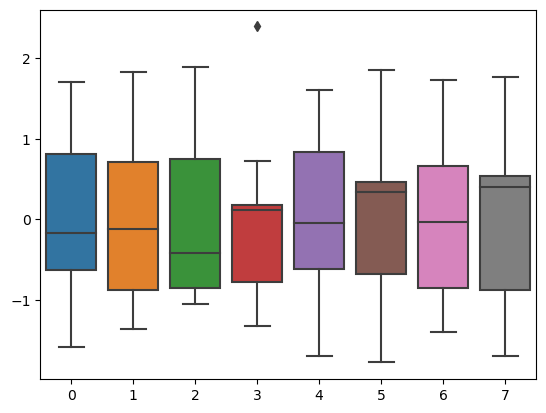

In [55]:
ax = sns.boxplot(data = df_std)
# printing this box plot to show that the all the means are close to 
# each other and close to "0" in other words, standardized.

In [56]:
df_std = pd.DataFrame(df_std) # converting into a data frame to be easier to be called

In [57]:
df_std.describe()

,0,1,2,3,4,5,6,7
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.776357e-16,0.000000,-5.551115e-17,-4.440892e-17,2.220446e-17,2.220446e-17,2.220446e-17,2.220446e-17
std,1.054093e+00,1.054093,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00
min,-1.589819e+00,-1.363376,-1.055962e+00,-1.322070e+00,-1.692972e+00,-1.779375e+00,-1.400798e+00,-1.700211e+00
25%,-6.328652e-01,-0.881886,-8.601868e-01,-7.778047e-01,-6.176596e-01,-6.788609e-01,-8.488887e-01,-8.823023e-01
50%,-1.735276e-01,-0.121639,-4.196929e-01,1.103374e-01,-4.129201e-02,3.331057e-01,-3.956111e-02,4.055786e-01
75%,8.089446e-01,0.714632,7.488397e-01,1.783706e-01,8.404644e-01,4.606556e-01,6.590398e-01,5.380019e-01
max,1.702101e+00,1.829661,1.892900e+00,2.393778e+00,1.610388e+00,1.851056e+00,1.733545e+00,1.768759e+00


In [58]:
# Import the library for normalisation of the data
from sklearn.preprocessing import MinMaxScaler

In [60]:
obj_norm = MinMaxScaler().fit(transposed_df) # just creating a object to normalisation

In [61]:
df_norm = obj_norm.transform(transposed_df) # this moment I'm applying the preprocessor

In [73]:
df_norm.head()

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.844961,0.111111,0.792531,0.125166,0.859375,0.167247,0.066646,0.172156
2,0.767442,0.095238,0.634855,0.210386,0.812500,0.286876,0.148067,0.314371
3,0.612403,0.333333,0.215768,0.383489,0.630208,0.554007,0.260138,0.606287
4,0.472868,0.444444,0.029046,0.392810,0.500000,0.614402,0.376454,0.646707


In [64]:
df_norm = pd.DataFrame(df_norm) # converting into a data frame to be easier to be called

In [65]:
df_norm.describe() # we can see that my data it's normalized from 0.3 - 1.0

,0,1,2,3,4,5,6,7
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.482946,0.426984,0.358091,0.355792,0.512500,0.490128,0.446919,0.490120
std,0.320206,0.330122,0.357457,0.283675,0.319097,0.290349,0.336304,0.303863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290698,0.150794,0.066390,0.146471,0.325521,0.303136,0.176085,0.235778
50%,0.430233,0.388889,0.215768,0.385486,0.500000,0.581882,0.434297,0.607036
75%,0.728682,0.650794,0.612033,0.403795,0.766927,0.617015,0.657183,0.645210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


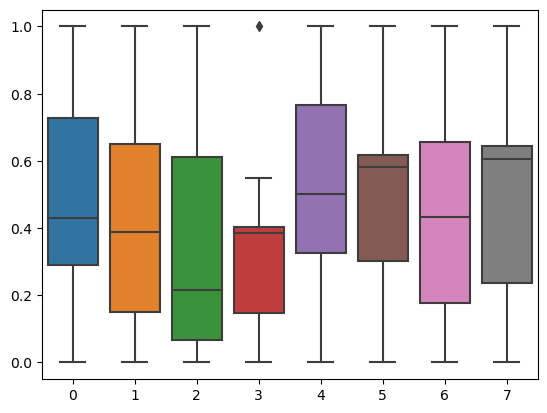

In [66]:
ax = sns.boxplot(data = df_norm)
# printing this box plot to show that the all the data is normalized but the menas not that close to each other

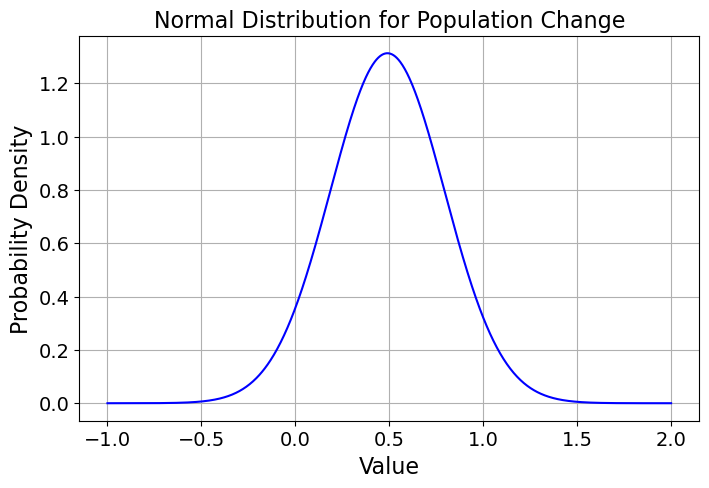

In [78]:
from scipy.stats import norm

# Mean and standard deviation for variable 7
mean = 0.490120
std_dev = 0.303863

# Generate values for the x-axis
x = np.linspace(-1, 2, 1000)  # Adjust the range as needed

# Calculate the PDF for the normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Create a plot of the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color= "b", label="Normal Distribution")
label_graph(14 ,"Value" , "Probability Density" , "Normal Distribution for Population Change" , 16 )
plt.grid(True)

# Show the plot
plt.show()